<a href="https://colab.research.google.com/github/spacemaninSeoul/fast_campus_ML300/blob/main/ML300_P4_C3_%EC%97%B0%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Step0: E-Commerce 데이터와 군집분석의 활용

### E-Commerce & Platform Business에서의 판매자(공급)

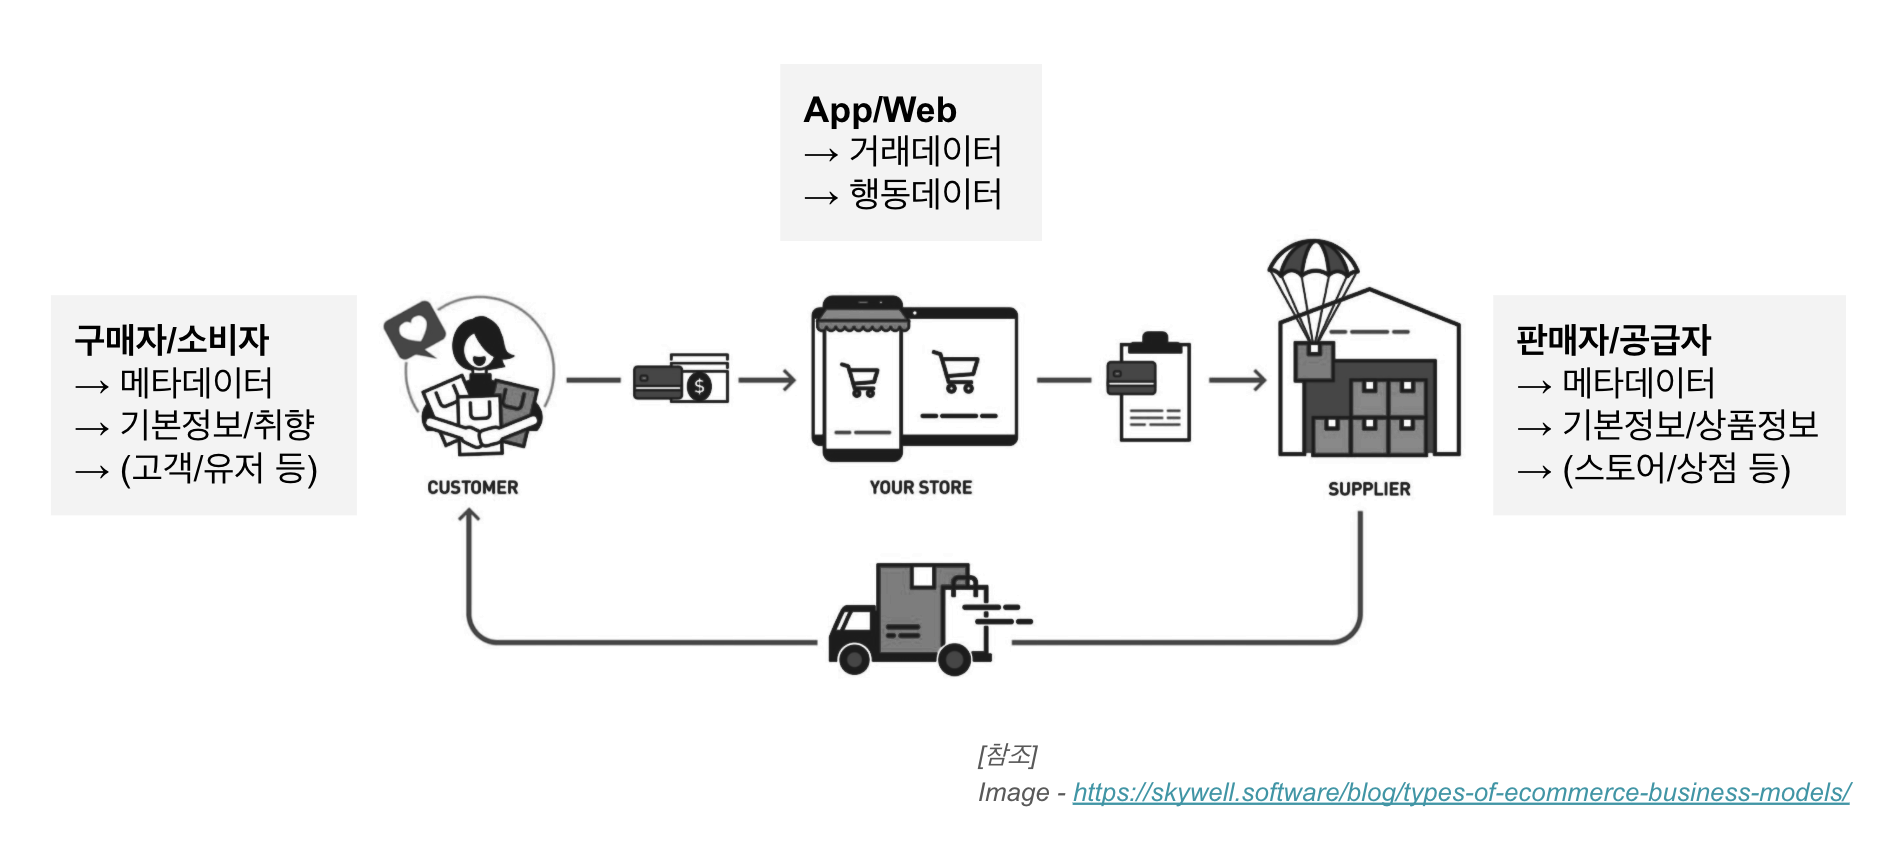

### Platform Business 판매자(공급) 데이터에 사용되는 용어

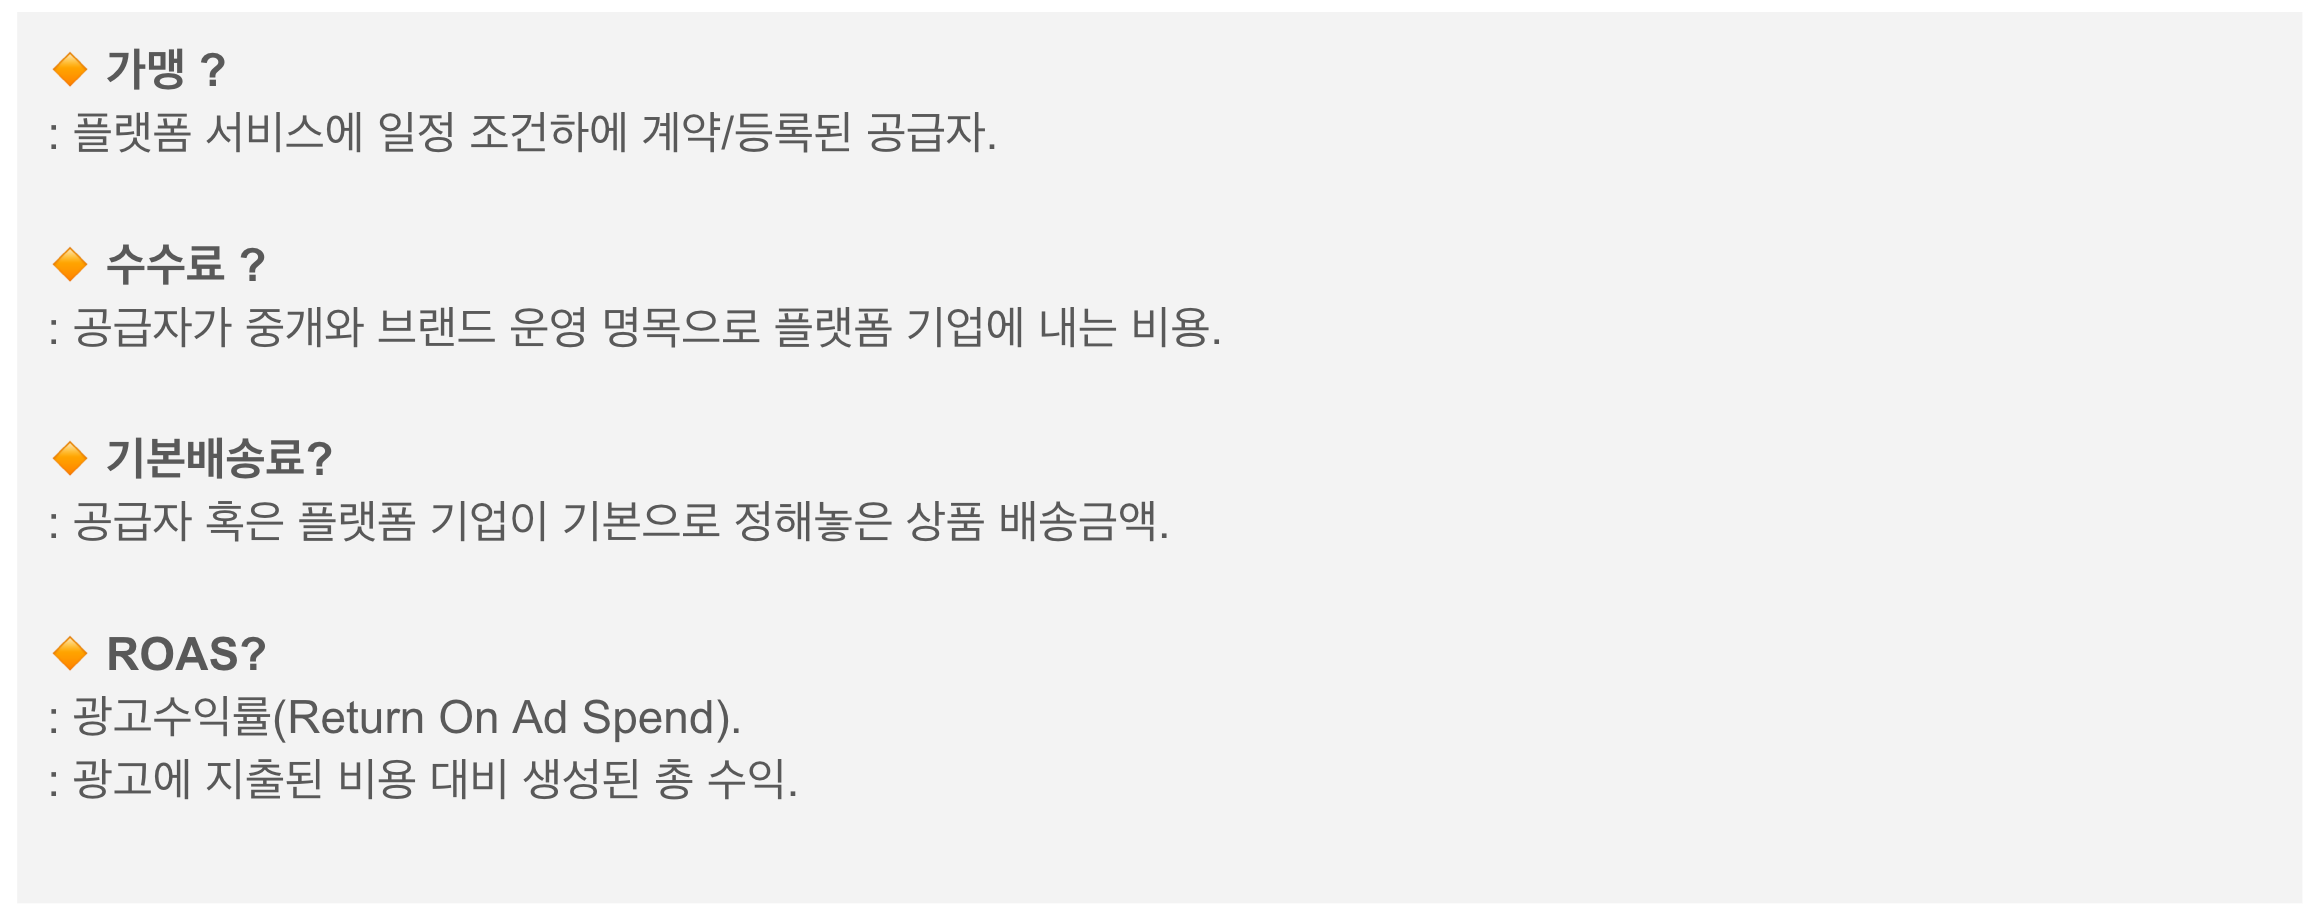

## Step1: E-Commerce 판매자(공급) 데이터 불러오기 & 전처리


### 문제 1. E-Commerce 데이터 불러오기 (stores, orders)
: 주어진 url을 사용해서 E-Commerce 데이터를 다운로드 받아보세요.

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings(action='ignore')
pd.set_option('display.max_columns', None)

In [2]:
# 데이터 url.
vendor_metadata_url = "https://raw.githubusercontent.com/dajeong-lecture/raw_data/main/vendor_meta_data.csv"
vendor_statsdata_url = "https://raw.githubusercontent.com/dajeong-lecture/raw_data/main/vendor_stats_data.csv"

vendor_metadata_df = pd.read_csv(vendor_metadata_url, parse_dates=[0])
vendor_stats_df = pd.read_csv(vendor_statsdata_url, parse_dates=[0])

In [3]:
# load된 데이터의 형태(shape)을 확인해보세요.
vendor_metadata_df.shape, vendor_stats_df.shape

((4588, 7), (4588, 11))

In [4]:
vendor_metadata_df.head()

,vendor_id,if_affiliation,joined_date,bookmark_cnt,item_cnt,base_shipping_fee,commission_rate
0,19sJIV53qJApk91,True,2019-10-23,74,126,2000.0,0.22
1,UChsuoA4cPkm4Uj,True,2019-10-27,1592,114,1600.0,0.25
2,CJ8MPRrVm66EPmG,False,2016-11-19,96,10,1600.0,0.04
3,svRpN9sEzk8r7Ws,True,2019-05-16,329,20,1900.0,0.11
4,refHs4aaigBf2DN,True,2019-03-17,1664,48,1300.0,0.08


In [5]:
vendor_stats_df.head()

,vendor_id,weekly_order_cnt,monthly_order_cnt,total_order_cnt,total_user_cnt,avg_cost,avg_delivery_cost,roas_growth_rate,review_score,review_rate,review_reply_rate
0,19sJIV53qJApk91,1.71,6.0,12,11,24200.000000,916.666667,0.104453,2.41,0.39,0.04
1,UChsuoA4cPkm4Uj,1.71,6.0,12,9,46916.666667,0.000000,0.095133,1.09,0.45,0.13
2,CJ8MPRrVm66EPmG,1.20,1.5,12,9,21875.000000,7375.000000,0.289356,3.69,0.51,0.22
3,svRpN9sEzk8r7Ws,2.40,4.0,12,9,21808.333333,2041.666667,0.177325,2.70,0.48,0.06
4,refHs4aaigBf2DN,1.71,2.4,12,9,22000.000000,1750.000000,0.097580,1.12,0.50,0.26


### 문제 2. E-Commerce 판매자 메타데이터 둘러보기 (metadata)
: 데이터별 컬럼 명세서를 통해 E-Commerce 판매자 메타 데이터를 파악해보세요.

#### [Vendor metadata 컬럼 명세서]  

컬럼명 | 설명
--- | ---
vendor_id | 판매자 고유 ID
if_affiliation | 가맹가능여부 (True:미계약상태, False:계약완료상태) 
joined_date | 등록일자 (yyyy-mm-dd) 
bookmark_cnt | 즐겨찾기 등록 수
item_cnt | 등록한 아이템/상품 수
base_shipping_fee | 기본 배송료(원)
commission_rate | 수수료율(%) 




In [6]:
# 컬럼의 데이터 타입을 확인해보세요.
vendor_metadata_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4588 entries, 0 to 4587
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   vendor_id          4588 non-null   object 
 1   if_affiliation     4588 non-null   bool   
 2   joined_date        4588 non-null   object 
 3   bookmark_cnt       4588 non-null   int64  
 4   item_cnt           4588 non-null   int64  
 5   base_shipping_fee  4588 non-null   float64
 6   commission_rate    4588 non-null   float64
dtypes: bool(1), float64(2), int64(2), object(2)
memory usage: 219.7+ KB


### 문제 3. E-Commerce 판매자 메타데이터 전처리하기 (metadata)
: E-Commerce 판매자 메타 데이터를 분석에 필요한 컬럼을 생성해보세요.

In [8]:
# 등록일자(joined_date)를 사용해서 2021년 1월 1일 기준 판매자의 등록기간을 생성해보세요.
today_ymd = datetime(2021, 1, 1)

# 가입일자의 포멧을 날짜형식('datetime64[ns]')으로 변경해보세요.
vendor_metadata_df['joined_date'] = vendor_metadata_df['joined_date'].astype('datetime64[ns]')

# 가입기간을 일(day)로 계산
vendor_metadata_df['days_from_joined'] = (today_ymd - vendor_metadata_df['joined_date']).dt.days

# 가입기간을 년도(year)로 계산해보세요. 
# [참고] np.timedelta64(1, "Y") 를 사용해보세요.
vendor_metadata_df['years_from_joined'] = (today_ymd - vendor_metadata_df['joined_date'])/np.timedelta64(1,  'Y')
vendor_metadata_df["years_from_joined"] = vendor_metadata_df["years_from_joined"].round(1)
vendor_metadata_df.head()

,vendor_id,if_affiliation,joined_date,bookmark_cnt,item_cnt,base_shipping_fee,commission_rate,days_from_joined,years_from_joined
0,19sJIV53qJApk91,True,2019-10-23,74,126,2000.0,0.22,436,1.2
1,UChsuoA4cPkm4Uj,True,2019-10-27,1592,114,1600.0,0.25,432,1.2
2,CJ8MPRrVm66EPmG,False,2016-11-19,96,10,1600.0,0.04,1504,4.1
3,svRpN9sEzk8r7Ws,True,2019-05-16,329,20,1900.0,0.11,596,1.6
4,refHs4aaigBf2DN,True,2019-03-17,1664,48,1300.0,0.08,656,1.8


In [9]:
# 가맹가능여부(if_affiliation)를 수치화 시켜보세요.
vendor_metadata_df['if_affiliation'] = vendor_metadata_df['if_affiliation'].map({True:0, False:1})

### 문제 4. E-Commerce 판매자 거래데이터 둘러보기 (transaction data)
: 데이터별 컬럼 명세서를 통해 E-Commerce 판매자 거래 데이터를 파악해보세요.

#### [Vendor stat 컬럼 명세서]  

컬럼명 | 설명
--- | ---
vendor_id | 판매자 고유 ID
weekly_order_cnt | 주평균 거래건수
monthly_order_cnt | 월평균 거래건수
total_order_cnt | 총 주문수
total_user_cnt | 총 주문고객수  
avg_cost | 평균 거래금액  
avg_delivery_cost | 평균 배송금액  
roas_growth_rate | ROAS(%)
review_score | 리뷰 점수
review_rate | 리뷰작성 비율(%)
review_reply_rate | 리뷰응대 비율(%)


			

In [10]:
# 컬럼의 데이터 타입을 확인해보세요.
vendor_stats_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4588 entries, 0 to 4587
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   vendor_id          4588 non-null   object 
 1   weekly_order_cnt   4588 non-null   float64
 2   monthly_order_cnt  4588 non-null   float64
 3   total_order_cnt    4588 non-null   int64  
 4   total_user_cnt     4588 non-null   int64  
 5   avg_cost           4588 non-null   float64
 6   avg_delivery_cost  4588 non-null   float64
 7   roas_growth_rate   4588 non-null   float64
 8   review_score       4588 non-null   float64
 9   review_rate        4588 non-null   float64
 10  review_reply_rate  4588 non-null   float64
dtypes: float64(8), int64(2), object(1)
memory usage: 394.4+ KB


In [11]:
# 컬럼별 분위수, 최소, 최대값등을 확인해보세요.
vendor_stats_df.describe()

,weekly_order_cnt,monthly_order_cnt,total_order_cnt,total_user_cnt,avg_cost,avg_delivery_cost,roas_growth_rate,review_score,review_rate,review_reply_rate
count,4588.000000,4588.000000,4588.000000,4588.000000,4.588000e+03,4588.000000,4588.000000,4588.000000,4588.000000,4588.000000
mean,3.795475,14.177786,177.446164,98.865083,3.560237e+04,4643.405785,0.318578,3.391120,0.571561,0.450767
std,7.122223,34.124848,651.841714,290.684361,3.101888e+04,2900.976243,0.114186,1.108313,0.121400,0.133586
min,1.000000,1.000000,12.000000,1.000000,6.204545e+03,0.000000,0.000000,-0.310000,0.030000,0.000000
25%,1.380000,2.820000,21.000000,15.000000,2.374900e+04,2082.770270,0.241364,2.640000,0.490000,0.360000
50%,2.100000,6.250000,43.000000,29.000000,2.997150e+04,5017.534213,0.318724,3.400000,0.570000,0.450000
75%,3.800000,13.762500,113.000000,73.000000,4.036186e+04,6816.387560,0.396785,4.160000,0.650000,0.540000
max,216.710000,1052.570000,22104.000000,8272.000000,1.047716e+06,77846.153846,0.724674,7.660000,0.980000,0.920000


## Step2: Clustering - 판매자(공급) 메타데이터를 이용한 군집화



### 문제 5. EDA : 판매자(메타데이터) - 1차원에서 살펴보기


In [14]:
# 컬럼별 null값 살펴보세요.
vendor_metadata_df.isnull().sum()

vendor_id            0
if_affiliation       0
joined_date          0
bookmark_cnt         0
item_cnt             0
base_shipping_fee    0
commission_rate      0
days_from_joined     0
years_from_joined    0
dtype: int64

In [15]:
# vendor_id 기준으로 unique 해야합니다. vendor_id 기준으로 중복 데이터를 확인해보세요.
vendor_metadata_df[vendor_metadata_df.duplicated(['vendor_id'])]

,vendor_id,if_affiliation,joined_date,bookmark_cnt,item_cnt,base_shipping_fee,commission_rate,days_from_joined,years_from_joined


In [20]:
vendor_metadata_df.groupby(['if_affiliation'])[['vendor_id']].count().reset_index()

,if_affiliation,vendor_id
0,0,2836
1,1,1752


In [25]:
# 등록기간(years_from_joined)에 따른 고객 분포를 확인해보세요.

vendor_cnt_from_joined_df = vendor_metadata_df.groupby(['years_from_joined'])[['vendor_id']].count().reset_index()
fig = px.bar(vendor_cnt_from_joined_df, x='years_from_joined', y='vendor_id')
fig.update_layout(height=500, width=1000)
fig.show()

In [26]:
# 등록한 아이템/상품수(item_cnt)에 분포를 Bar plot으로 확인해보세요.
vendor_item_cnt_df = vendor_metadata_df.groupby(['item_cnt'])[['vendor_id']].count().reset_index()
fig = px.bar(vendor_item_cnt_df, x='item_cnt', y='vendor_id')
fig.update_layout(height=500, width=1000)
fig.show()

In [27]:
# 등록한 아이템/상품수(item_cnt)에 분포를 Box plot으로 확인해보세요.
fig = px.box(vendor_metadata_df, y='item_cnt', points='all')
fig.show()

In [28]:
# 수수료율(commission_rate)의 분포를 Bar plot으로 확인해보세요.
vendor_comm_rate_df = vendor_metadata_df.groupby(['commission_rate'])[['vendor_id']].count().reset_index()
fig = px.bar(vendor_comm_rate_df, x='commission_rate', y='vendor_id')
fig.update_layout(height=500, width=1000)
fig.show()

### 문제 6. EDA : 판매자(메타데이터) - 2차원에서 살펴보기

In [29]:
# 변수간 상관계수를 살펴보세요.
corr_matrix = vendor_metadata_df.corr()
corr_matrix

,if_affiliation,bookmark_cnt,item_cnt,base_shipping_fee,commission_rate,days_from_joined,years_from_joined
if_affiliation,1.000000,0.166854,0.079686,-0.004122,-0.106717,0.638232,0.638125
bookmark_cnt,0.166854,1.000000,0.008374,-0.003479,-0.038308,0.278736,0.279422
item_cnt,0.079686,0.008374,1.000000,0.231289,0.021084,0.102564,0.102676
base_shipping_fee,-0.004122,-0.003479,0.231289,1.000000,0.451113,0.000226,0.000068
commission_rate,-0.106717,-0.038308,0.021084,0.451113,1.000000,-0.159884,-0.160044
days_from_joined,0.638232,0.278736,0.102564,0.000226,-0.159884,1.000000,0.999897
years_from_joined,0.638125,0.279422,0.102676,0.000068,-0.160044,0.999897,1.000000


In [30]:
# 유효한 정보만 확인하는 방법입니다.
# [참고] 상관계수중에 상대적/비교적으로 높은 관계를 찾아보세요.
"""
if_affiliation는 binary변수이므로, 수치변수중에 상관관계가 높은 변수를 찾습니다.
"""
corr_matrix[abs(corr_matrix) >= 0.4]

,if_affiliation,bookmark_cnt,item_cnt,base_shipping_fee,commission_rate,days_from_joined,years_from_joined
if_affiliation,1.000000,NaN,NaN,NaN,NaN,0.638232,0.638125
bookmark_cnt,NaN,1.0,NaN,NaN,NaN,NaN,NaN
item_cnt,NaN,NaN,1.0,NaN,NaN,NaN,NaN
base_shipping_fee,NaN,NaN,NaN,1.000000,0.451113,NaN,NaN
commission_rate,NaN,NaN,NaN,0.451113,1.000000,NaN,NaN
days_from_joined,0.638232,NaN,NaN,NaN,NaN,1.000000,0.999897
years_from_joined,0.638125,NaN,NaN,NaN,NaN,0.999897,1.000000


In [31]:
# base_shipping_fee & commission_rate 관계를 나타내는 scatter plot을 그려보세요.
fig = px.scatter(vendor_metadata_df, x='base_shipping_fee', y='commission_rate')
fig.update_layout(width=600, height=500)
fig.show()

In [32]:
# 가맹여부(if_affiliation)에 따른 변수별 평균값에 차이가 있는지 확인해보세요 (groupby() 사용.)
vendor_metadata_df.groupby(['if_affiliation']).mean()

,bookmark_cnt,item_cnt,base_shipping_fee,commission_rate,days_from_joined,years_from_joined
if_affiliation,,,,,,
0,905.391044,86.015515,2095.169252,0.238011,1002.209803,2.744217
1,1171.159247,97.490297,2090.981735,0.208094,1935.946918,5.303995


### 문제 7. Clustering : 판매자(메타데이터) - 메타데이터 훈련을 위한 정제


In [34]:
# 판매자 메타데이터에서 군집분석을 위한 변수만 남겨보세요.
# [참고] 아래 리스트(numerics_types)를 사용하여 숫자 형태의 변수만 남겨보세요.
numerics_types = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
vendor_numerics_df = vendor_metadata_df.select_dtypes(include=numerics_types)
vendor_numerics_df.head()

,if_affiliation,bookmark_cnt,item_cnt,base_shipping_fee,commission_rate,days_from_joined,years_from_joined
0,0,74,126,2000.0,0.22,436,1.2
1,0,1592,114,1600.0,0.25,432,1.2
2,1,96,10,1600.0,0.04,1504,4.1
3,0,329,20,1900.0,0.11,596,1.6
4,0,1664,48,1300.0,0.08,656,1.8


In [35]:
# 군집화에서 binary변수와 일반 숫자변수를 혼용해서 훈련시키는 것을 지양합니다.
# binary변수를 제거하세요.
# [참고] np.isin()을 활용해보세요.
user_numerics_cols = [col for col in vendor_numerics_df if np.isin(vendor_numerics_df[col].unique(), [0, 1]).all()]
vendor_numerics_df = vendor_numerics_df.drop(user_numerics_cols, axis=1)
vendor_numerics_df.head()

,bookmark_cnt,item_cnt,base_shipping_fee,commission_rate,days_from_joined,years_from_joined
0,74,126,2000.0,0.22,436,1.2
1,1592,114,1600.0,0.25,432,1.2
2,96,10,1600.0,0.04,1504,4.1
3,329,20,1900.0,0.11,596,1.6
4,1664,48,1300.0,0.08,656,1.8


In [36]:
# 남겨진 변수의 평균, 분산등의 정보를 확인해보세요.
# [참고] min/max 값이 다른 변수들과 차이가 많이나는 변수를 기억해주세요.
vendor_numerics_df.describe()

,bookmark_cnt,item_cnt,base_shipping_fee,commission_rate,days_from_joined,years_from_joined
count,4588.000000,4588.000000,4588.000000,4588.000000,4588.000000,4588.000000
mean,1006.878814,90.397341,2093.570183,0.226587,1358.772014,3.721709
std,773.946202,69.969414,493.648413,0.136219,710.869467,1.949129
min,0.000000,0.000000,400.000000,0.000000,381.000000,1.000000
25%,389.000000,36.000000,1800.000000,0.120000,585.000000,1.600000
50%,845.000000,76.000000,2100.000000,0.210000,1404.500000,3.800000
75%,1448.250000,129.000000,2400.000000,0.320000,2034.000000,5.600000
max,4710.000000,430.000000,3900.000000,0.790000,2447.000000,6.700000


### 문제 8. Clustering : 판매자(메타데이터) - 메타데이터 Normalization(정규화) 적용하기

In [37]:
# Min-Max Normalization 모듈 import
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler를 사용하여 고객 메타데이터의 값들을 0, 5 사이 값으로 정규화
mm_scaler = MinMaxScaler(feature_range=(0, 5))
scaled_vendor_metadata = mm_scaler.fit_transform(vendor_numerics_df)
scaled_vendor_metadata_df = pd.DataFrame(scaled_vendor_metadata, columns = vendor_numerics_df.columns)
scaled_vendor_metadata_df.head

,bookmark_cnt,item_cnt,base_shipping_fee,commission_rate,days_from_joined,years_from_joined
0,0.078556,1.465116,2.285714,1.392405,0.133107,0.175439
1,1.690021,1.325581,1.714286,1.582278,0.123427,0.175439
2,0.101911,0.116279,1.714286,0.253165,2.717812,2.719298
3,0.349257,0.232558,2.142857,0.696203,0.520329,0.526316
4,1.766454,0.558140,1.285714,0.506329,0.665537,0.701754


In [38]:
# 정규화시킨 데이터를 train/test set으로 9:1의 비율로 나눠보세요. (train_test_split)
train_df, test_df = train_test_split(scaled_vendor_metadata_df, test_size=0.1)

In [39]:
train_df.head()

,bookmark_cnt,item_cnt,base_shipping_fee,commission_rate,days_from_joined,years_from_joined
2637,1.623142,2.000000,4.000000,2.468354,0.196031,0.263158
2885,0.703822,1.046512,2.857143,0.949367,1.287512,1.315789
2479,0.032909,0.976744,2.857143,0.949367,1.236689,1.228070
4239,0.490446,0.534884,1.857143,0.822785,3.487415,3.508772
211,1.325902,0.023256,1.000000,0.632911,4.975799,5.000000


### 문제 9. Clustering : 판매자(메타데이터) - 정규화된 메타데이터로 최적의 k 찾기 (Elbow method)

In [40]:
# K-Means 모듈을 import
from sklearn.cluster import KMeans

In [42]:
from pandas.core.common import random_state
from scipy.sparse.construct import random
# elbow method를 사용해 최적의 k를 찾기
distortions = []
k_range = range(1, 11)

for i in k_range:
  km =KMeans(n_clusters=i, random_state=42)
  km.fit(train_df)
  distortions.append(km.inertia_)

print(distortions)

[34911.08701556953, 14613.566527235442, 11890.480320111827, 10711.41177292787, 9679.01134170857, 8707.280936916242, 8104.321207056686, 7648.36380487114, 7231.538600073578, 6858.987225615681]


In [43]:
# elbow method를 그래프로 확인해보세요.
# x축이 k의 수, y축이 distortions인 line plot을 그려봅시다.
fig = px.line(x=k_range, y=distortions, labels={'x':'k', 'y':'distortions'})
fig.update_layout(width=800, height=500)
fig.show()

### 문제 10. Clustering : 판매자(메타데이터) - 메타데이터로 K-Means 훈련시키기

In [45]:
km = KMeans(n_clusters=3)
km.fit(train_df)

KMeans(n_clusters=3)

### 문제 11. Clustering : 판매자(메타데이터) - 훈련된 K-Means 결과 확인/해석하기

In [46]:
# 각 군집의 변수별 중심값을 비교해보세요.
# [참고] 변수별 중심값은 km.cluster_centers_ 를 활용하세요.
pd.DataFrame(km.cluster_centers_, columns=train_df.columns)

,bookmark_cnt,item_cnt,base_shipping_fee,commission_rate,days_from_joined,years_from_joined
0,1.564005,1.177212,2.415346,1.261219,4.363848,4.372430
1,0.946653,0.991673,2.406520,1.587604,0.512254,0.546069
2,0.643261,0.984746,2.420891,1.413559,2.719345,2.736748


In [47]:
# 각 군집별 데이터 수도 확인해보세요.
# [참고] K-means는 outlier를 잡지 않기 때문에 (=모든 데이터를 cluster화 시키기 때문에) 각 군집마다 포함된 데이터양을 비교해보면 좋습니다.
label_list = list(km.labels_)
[[x, label_list.count(x)] for x in set(label_list)]

[[0, 1365], [1, 1652], [2, 1112]]

### 문제 12. Clustering : 판매자(메타데이터) - k를 변경해서 K-Means를 훈련결과 비교하기

In [48]:
# k를 2-5 혹은 다른 값으로 변경해서 군집의 중심값을 비교해보세요.
km = KMeans(n_clusters = 4)
km.fit(train_df)
pd.DataFrame(km.cluster_centers_, columns=train_df.columns)

,bookmark_cnt,item_cnt,base_shipping_fee,commission_rate,days_from_joined,years_from_joined
0,0.603491,0.952818,2.465804,1.485909,2.029860,2.053522
1,0.987408,0.988707,2.400881,1.592509,0.417201,0.450892
2,2.062624,1.149467,2.406083,1.227603,4.656335,4.666893
3,0.793349,1.128573,2.400857,1.329560,3.624123,3.634085


In [50]:
label_list = list(km.labels_)
[[x, label_list.count(x)] for x in set(label_list)]

[[0, 728], [1, 1491], [2, 778], [3, 1132]]

### 문제 13. Clustering : 판매자(메타데이터) - 정규화된 메타데이터로 최적의 k 찾기 (Silhouette method)

In [ ]:
"""
> "Silhouette method"란?  
: **cluster내의 거리와 cluster간의 거리**를 사용한 계수로 Silhouette coefficient(SC)값이 최대가 되는 k를 찾는 방법.


> SC 해석?  
: 각 cluster 사이의 거리가 멀고 cluster 내 데이터의 거리가 작을수록 군집 분석의 성능이 좋음.
Silhouette 값은 -1에서 1까지 가능하며, 0일 경우에는 cluster간의 변별력이 없다는 의미. -1에 가까울수록 clustering의 결과가 좋지 않음을 의미.
"""

'\n> "Silhouette method"란?  \n: **cluster내의 거리와 cluster간의 거리**를 사용한 계수로 Silhouette coefficient(SC)값이 최대가 되는 k를 찾는 방법.\n\n\n> SC 해석?  \n: 각 cluster 사이의 거리가 멀고 cluster 내 데이터의 거리가 작을수록 군집 분석의 성능이 좋음.\nSilhouette 값은 -1에서 1까지 가능하며, 0일 경우에는 cluster간의 변별력이 없다는 의미. -1에 가까울수록 clustering의 결과가 좋지 않음을 의미.\n'

In [53]:
!pip install yellowbrick

     |████████████████████████████████| 271 kB 3.9 MB/s 
     |████████████████████████████████| 14.8 MB 32.4 MB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.5
    Uninstalling numpy-1.21.5:
      Successfully uninstalled numpy-1.21.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.8.0 requires tf-estimator-nightly==2.8.0.dev2021122109, which is not installed.
tensorflow 2.8.0 requires numpy>=1.20, but you have numpy 1.19.5 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [54]:
# SilhouetteVisualizer 사용해서 훈련(training)과 그래프를 한번에 해결해보세요.
from yellowbrick.cluster import SilhouetteVisualizer

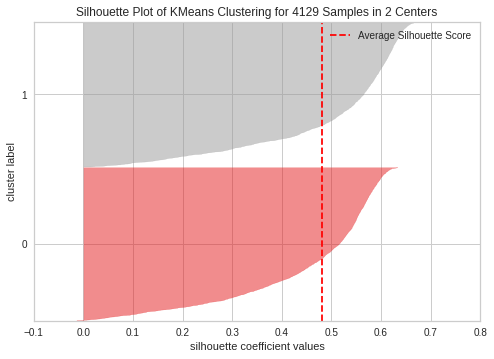

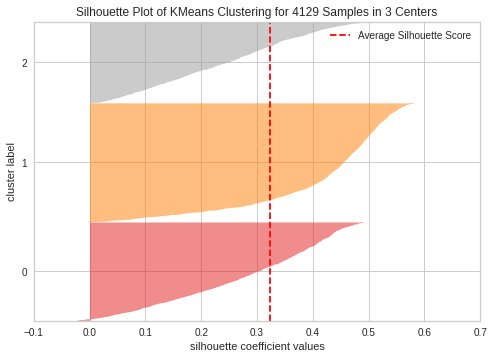

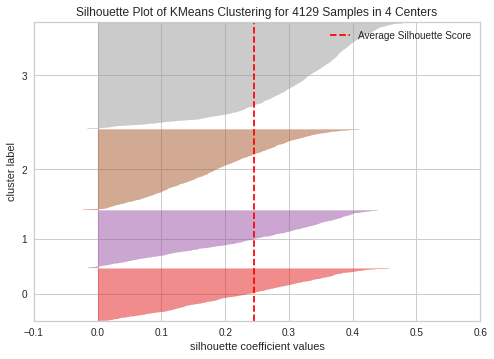

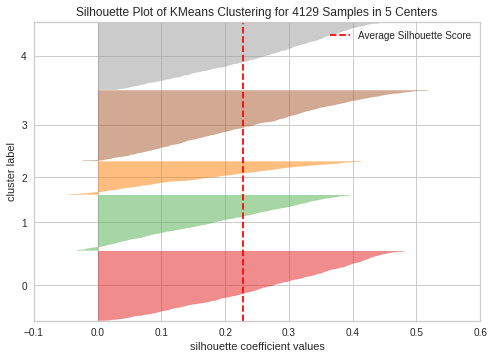

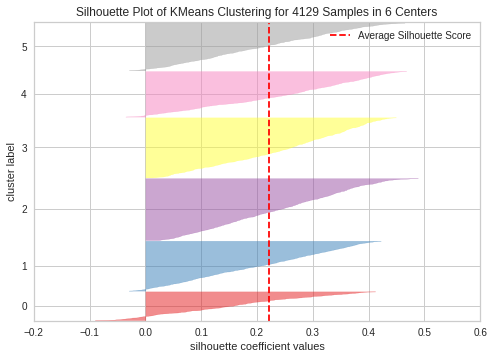

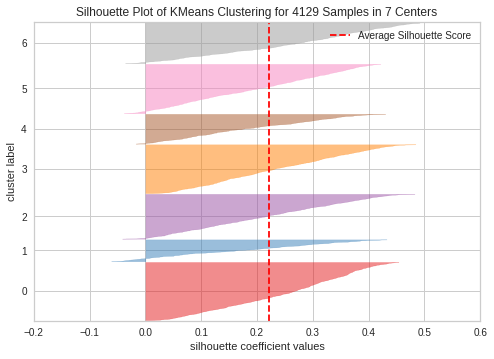

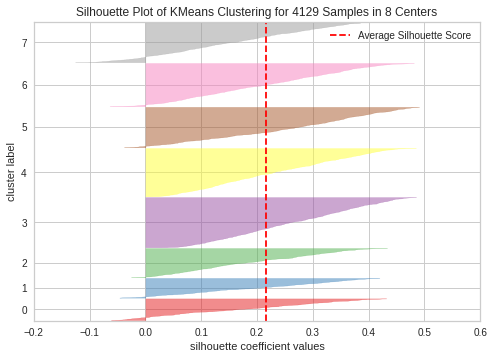

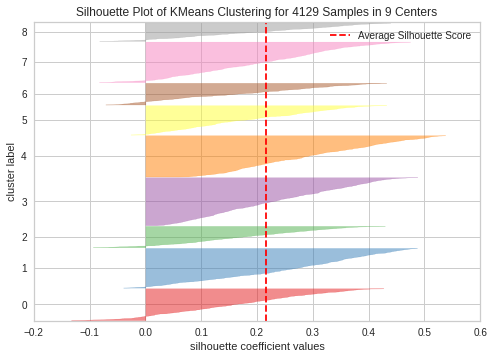

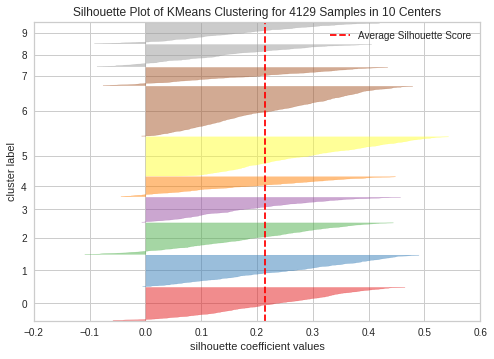

In [55]:
# k의 범위를 지정해주세요.
# [주의!] 최소 2개이상의 label/cluster가 있어야 합니다.
k_range = range(2, 11)
for i in k_range:
  km = KMeans(n_clusters = i, init='k-means++')
  visualizer = SilhouetteVisualizer(km)
  visualizer.fit(train_df)
  visualizer.poof()

### 문제 14. Clustering : 판매자(메타데이터) - 최적의 k를 정하여 최종으로 K-Means 훈련시키기

In [56]:
# k를 2-5 혹은 다른 값으로 변경해서 군집의 중심값을 비교해보세요.
km_model = KMeans(n_clusters = 3)
km_model.fit(train_df)
pd.DataFrame(km_model.cluster_centers_, columns = train_df.columns)

,bookmark_cnt,item_cnt,base_shipping_fee,commission_rate,days_from_joined,years_from_joined
0,1.563419,1.176713,2.415260,1.261133,4.362627,4.371227
1,0.946653,0.991673,2.406520,1.587604,0.512254,0.546069
2,0.642326,0.985011,2.421005,1.413938,2.717886,2.735283


### 문제 15. Clustering : 판매자(메타데이터) - 메타데이터로 Agglomerative 훈련시키기  
: 동일한 데이터로 Agglomerative 알고리즘을 훈련시켜봅니다.


In [57]:
from sklearn.cluster import AgglomerativeClustering
# Agglomerative의 파라미터 설정 시, linkage="ward", affinity="euclidean"로 설정해 보세요.
# n_clusters는 kmeans의 최적의 k를 참고하여 자유롭게 설정해보세요.
aggl = AgglomerativeClustering(n_clusters=4, linkage='ward', affinity='euclidean').fit(train_df)
aggl

AgglomerativeClustering(n_clusters=4)

In [58]:
# 훈련된 label을 변수에 저장하세요.
aggl_labels = aggl.labels_
aggl_labels

array([1, 2, 2, ..., 1, 2, 0])

In [59]:
# K-Means와 Agglomerative 알고리즘 결과에 차이가 있는지 시각화로 비교해보세요.
fig = make_subplots(rows=1, cols=2, subplot_titles=('K-Means cluster', 'Agglomerative cluster'))

fig.add_trace(
    go.Scatter(x=train_df['item_cnt'],
               y=train_df['years_from_joined'],
               mode='markers',
               marker=dict(color=km_model.labels_),),
              row=1, col=1
)

fig.add_trace(
    go.Scatter(x=train_df['item_cnt'],
               y=train_df['years_from_joined'],
               mode='markers',
               marker=dict(color=aggl_labels)),
              row=1, col=2
)

fig.update_layout(height=600, width=800, showlegend=False)
fig.show()

### 문제 16. Clustering : 판매자(메타데이터) - 훈련된 모델에 test set을 사용해 predict 하기

In [60]:
# [문제 14]의 모델을 그대로 사용하여 prediction을 해보세요.
test_vendor_metadata_label_df = test_df.copy()
test_cluster = km_model.fit_predict(test_df)
test_vendor_metadata_label_df['label_from_km'] = test_cluster

In [61]:
# [문제 15]의 모델을 그대로 사용하여 prediction을 해보세요.
test_cluster = aggl.fit_predict(test_df)
test_vendor_metadata_label_df['label_from_aggl'] = test_cluster

In [64]:
# [문제 15]과 동일하게 그래프로 prediction결과를 비교해보세요.
fig = make_subplots(rows=1, cols=2, subplot_titles=('K-mean cluster', 'Agglomerative cluster'))

fig.add_trace(
    go.Scatter(x=test_vendor_metadata_label_df['item_cnt'],
               y=test_vendor_metadata_label_df['years_from_joined'],
               mode='markers',
               marker=dict(color=test_vendor_metadata_label_df['label_from_km']))
,row=1, col=1)

fig.add_trace(
    go.Scatter(x=test_vendor_metadata_label_df['item_cnt'],
               y=test_vendor_metadata_label_df['years_from_joined'],
               mode='markers',
               marker=dict(color=test_vendor_metadata_label_df['label_from_aggl']))
row=1,col=2)

fig.update_layout(height=600, width=800)
fig.show()

## Step3: Clustering - 판매자(공급) 컨설팅에 활용할 그룹으로 군집화 (거래데이터 활용)
: Step3에서는 판매자 거래데이터를 함께 사용합니다.   
: PCA를 통해 차원을 축소하고, HDBSCAN 모델을 훈련시키고 최적의 파라미터를 찾는 방법을 반복하여, 가장 적합한 모델로 훈련시킵니다.

### 문제 17. EDA : 판매자(거래데이터) - 변수간 상관관계 살펴보기

In [65]:
# 판매자 거래데이터를 살펴보세요. (vendor_stats_df)
vendor_stats_df.head(2)

,vendor_id,weekly_order_cnt,monthly_order_cnt,total_order_cnt,total_user_cnt,avg_cost,avg_delivery_cost,roas_growth_rate,review_score,review_rate,review_reply_rate
0,19sJIV53qJApk91,1.71,6.0,12,11,24200.000000,916.666667,0.104453,2.41,0.39,0.04
1,UChsuoA4cPkm4Uj,1.71,6.0,12,9,46916.666667,0.000000,0.095133,1.09,0.45,0.13


In [66]:
corr_matrix = vendor_stats_df.corr()
corr_matrix

,weekly_order_cnt,monthly_order_cnt,total_order_cnt,total_user_cnt,avg_cost,avg_delivery_cost,roas_growth_rate,review_score,review_rate,review_reply_rate
weekly_order_cnt,1.000000,0.992662,0.916604,0.910951,-0.034530,-0.100294,0.126901,0.099584,0.122862,0.254062
monthly_order_cnt,0.992662,1.000000,0.937016,0.930361,-0.034132,-0.087311,0.131289,0.101787,0.128190,0.264406
total_order_cnt,0.916604,0.937016,1.000000,0.979115,-0.002231,0.029267,0.117747,0.088232,0.128882,0.253386
total_user_cnt,0.910951,0.930361,0.979115,1.000000,-0.008073,0.013124,0.137139,0.099840,0.143133,0.288209
avg_cost,-0.034530,-0.034132,-0.002231,-0.008073,1.000000,0.347557,0.003964,0.012409,0.010270,-0.008317
avg_delivery_cost,-0.100294,-0.087311,0.029267,0.013124,0.347557,1.000000,-0.015499,0.004110,0.024460,-0.007112
roas_growth_rate,0.126901,0.131289,0.117747,0.137139,0.003964,-0.015499,1.000000,0.738310,0.020874,0.442410
review_score,0.099584,0.101787,0.088232,0.099840,0.012409,0.004110,0.738310,1.000000,0.133786,0.096454
review_rate,0.122862,0.128190,0.128882,0.143133,0.010270,0.024460,0.020874,0.133786,1.000000,0.593493
review_reply_rate,0.254062,0.264406,0.253386,0.288209,-0.008317,-0.007112,0.442410,0.096454,0.593493,1.000000


In [67]:
# 상관계수중에 상대적/비교적으로 높은 관계를 찾아보세요.

corr_matrix[abs(corr_matrix)>=0.4]

,weekly_order_cnt,monthly_order_cnt,total_order_cnt,total_user_cnt,avg_cost,avg_delivery_cost,roas_growth_rate,review_score,review_rate,review_reply_rate
weekly_order_cnt,1.000000,0.992662,0.916604,0.910951,NaN,NaN,NaN,NaN,NaN,NaN
monthly_order_cnt,0.992662,1.000000,0.937016,0.930361,NaN,NaN,NaN,NaN,NaN,NaN
total_order_cnt,0.916604,0.937016,1.000000,0.979115,NaN,NaN,NaN,NaN,NaN,NaN
total_user_cnt,0.910951,0.930361,0.979115,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
avg_cost,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
avg_delivery_cost,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
roas_growth_rate,NaN,NaN,NaN,NaN,NaN,NaN,1.00000,0.73831,NaN,0.442410
review_score,NaN,NaN,NaN,NaN,NaN,NaN,0.73831,1.00000,NaN,NaN
review_rate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.593493
review_reply_rate,NaN,NaN,NaN,NaN,NaN,NaN,0.44241,NaN,0.593493,1.000000


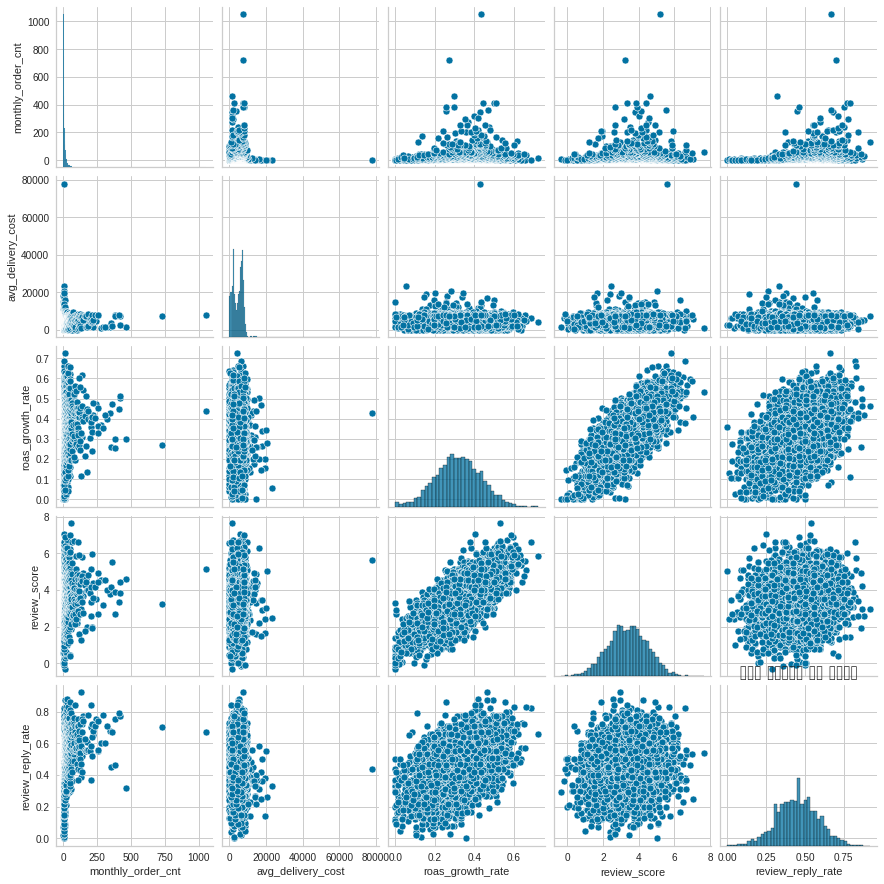

In [68]:
# 상관관계를 기반으로 변수를 선택해서 Scatter plot을 그려보세요.
# ["monthly_order_cnt", "avg_delivery_cost", "roas_growth_rate", "review_score", "review_reply_rate"]

sns.pairplot(vendor_stats_df[["monthly_order_cnt", "avg_delivery_cost", "roas_growth_rate", "review_score", "review_reply_rate"]])
plt.title('판매자 거래데이터 변수 상관관계', fontsize=20)
plt.show()

### 문제 18. Clustering : 판매자(거래데이터) - HDBSCAN 모델 install & 정규화 적용하기
: HDBSCAN 모듈을 설치하고 판매자 거래데이터를 train&test set 으로 분리하세요.

In [69]:
!pip install hdbscan

     |████████████████████████████████| 5.2 MB 2.7 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 15.7 MB 34.1 MB/s 
  Created wheel for hdbscan: filename=hdbscan-0.8.28-cp37-cp37m-linux_x86_64.whl size=2327690 sha256=85beff7834a9c4ee9f079e64395b79b90995e1fc65c2c4fb0f40a4c38260eff5
  Stored in directory: /root/.cache/pip/wheels/6e/7a/5e/259ccc841c085fc41b99ef4a71e896b62f5161f2bc8a14c97a
Successfully built hdbscan
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.8.0 requires tf-estimator-nightly==2.8.0.dev2021122109, which is not installed.
yellowbrick 1.3.post1 requires numpy<1.

In [70]:
# 거래 데이터의 컬럼과 모델 훈련에 필요한 컬럼을 선택해보세요.
# [참고] 수치화되지 않은 컬럼을 제외하세요.
vendor_stats_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4588 entries, 0 to 4587
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   vendor_id          4588 non-null   object 
 1   weekly_order_cnt   4588 non-null   float64
 2   monthly_order_cnt  4588 non-null   float64
 3   total_order_cnt    4588 non-null   int64  
 4   total_user_cnt     4588 non-null   int64  
 5   avg_cost           4588 non-null   float64
 6   avg_delivery_cost  4588 non-null   float64
 7   roas_growth_rate   4588 non-null   float64
 8   review_score       4588 non-null   float64
 9   review_rate        4588 non-null   float64
 10  review_reply_rate  4588 non-null   float64
dtypes: float64(8), int64(2), object(1)
memory usage: 394.4+ KB


In [71]:
# 선택한 컬럼으로 데이터셋을 나눠주세요.
"""
'vendor_id' 제외
"""
vendor_numerics_df = vendor_stats_df[['monthly_order_cnt', 'avg_cost', 'avg_delivery_cost', 'roas_growth_rate',
       'review_score', 'review_rate', 'review_reply_rate']]

In [72]:
mm_scaler = MinMaxScaler(feature_range=(0, 5))
scaled_vendor_stats = mm_scaler.fit_transform(vendor_numerics_df)
scaled_vendor_stats_df = pd.DataFrame(scaled_vendor_stats, columns=vendor_numerics_df.columns)
scaled_vendor_stats_df.head()

,monthly_order_cnt,avg_cost,avg_delivery_cost,roas_growth_rate,review_score,review_rate,review_reply_rate
0,0.023774,0.086391,0.058877,0.720692,1.706399,1.894737,0.217391
1,0.023774,0.195447,0.000000,0.656382,0.878294,2.210526,0.706522
2,0.002377,0.075229,0.473691,1.996456,2.509410,2.526316,1.195652
3,0.014264,0.074909,0.131135,1.223478,1.888331,2.368421,0.326087
4,0.006657,0.075830,0.112401,0.673268,0.897114,2.473684,1.413043


### 문제 19. Clustering : 판매자(거래데이터) - 데이터셋 분리하기
: 판매자 거래데이터를 train&test set 으로 분리하세요.

In [73]:
# 정규화시킨 데이터를 train/test set으로 9:1의 비율로 나눠보세요. (train_test_split)
train_df, test_df = train_test_split(scaled_vendor_stats_df, test_size=0.1)

In [74]:
# 결과 라벨을 저장하기 위한 dataframe을 생성합니다.
hdb_data_df = train_df.copy()

### 문제 20. Clustering : 판매자(거래데이터) - HDBSCAN 모델 파라미터 탐색하기
: 판매자 거래데이터의 clustering을 위해 HDBSCAN 모듈을 훈련시키고 파라미터를 탐색해보세요.

In [75]:
# hdbscan 모듈을 import 합니다.
import hdbscan

In [77]:
# min_samples 파라미터를 비교하는 함수를 사용해보세요.
# [참고] min_cluster_size=30, label_name="hdbscan_label", x_col="total_order_cnt" , y_col="avg_delivery_cost" 로 설정해주세요. 

def opt_hdbscan(train_x, ms_list, data_df, min_cluster_size=30, label_name='hdbscan_label', x_col='total_order_cnt', y_col='avg_delivery_cost'):
  for ms in ms_list:
    hdbscan_label = hdbscan.HDBSCAN(min_cluster_size=min_cluster_size, min_samples=ms, prediction_data=True).fit_predict(train_x)
    data_df[label_name] = hdbscan_label
    data_df[label_name] = data_df[label_name].astype(str)

    # outlier 추세 확인 (outlier=클러스터명이 -1인 경우)
    hdbscan_case_dict = dict((x, list(hdbscan_label).count(x)) for x in set(hdbscan_label))
    outliers = hdbscan_case_dict[-1]

    # 시각화하기
    fig = px.scatter(data_df, x=x_col, y=y_col, color=label_name)
    fig.update_layout(width=600, height=500, title=f'min_samples={ms} > label 수 : {len(set(hdbscan_label))}, outlier: {outliers}')
    fig.show()

    # 군집별 데이터 분포 확인
    hdb_cluster_df = data_df.groupby(label_name).mean()
    hdb_cluster_df['point_cnt'] = data_df[label_name].value_counts()
    print(hdb_cluster_df)
  return data_df

In [78]:
# 만든 함수로 파라미터를 비교해보세요. (min_cluster_size=5)
"""
# min_samples 숫자가 커질수록 보수적인 방법입니다. (=outlier로 판단되는 데이터가 증가합니다.)
[10, 20, 30, 50] >> [1, 3, 5, 10] 
x="total_order_cnt", y="avg_cost"
x="total_cost", y="avg_cost"
"""

ms_list = [1, 3, 5, 10]

hdb_data_df = opt_hdbscan(train_df, ms_list, hdb_data_df, min_cluster_size=5, label_name='hdbscan_label', x_col='monthly_order_cnt', y_col ='avg_delivery_cost')

               monthly_order_cnt  avg_cost  avg_delivery_cost  \
hdbscan_label                                                   
-1                      0.356031  0.305593           0.424718   
0                       0.009215  0.098490           0.343968   
1                       0.012903  0.151315           0.272549   
2                       0.007574  0.127180           0.358941   
3                       0.049397  0.134899           0.293355   

               roas_growth_rate  review_score  review_rate  review_reply_rate  \
hdbscan_label                                                                   
-1                     2.360531      2.514323     3.066582           2.661079   
0                      0.508720      0.509410     1.147368           1.163043   
1                      1.249373      1.794228     1.244019           0.484190   
2                      0.564882      1.092490     1.616541           0.861801   
3                      2.201123      2.315861     2.850307

               monthly_order_cnt  avg_cost  avg_delivery_cost  \
hdbscan_label                                                   
-1                      0.125556  0.184905           0.332937   
0                       0.044724  0.133526           0.320916   
1                       0.043742  0.129815           0.289330   
2                       0.102019  0.141184           0.251804   

               roas_growth_rate  review_score  review_rate  review_reply_rate  \
hdbscan_label                                                                   
-1                     2.267642      2.342245     2.874050           2.518623   
0                      3.407838      3.252196     4.231579           4.043478   
1                      2.179340      2.310406     2.840409           2.427138   
2                      2.383916      2.109159     3.831579           3.923913   

               point_cnt  
hdbscan_label             
-1                   893  
0                      5  
1             

               monthly_order_cnt  avg_cost  avg_delivery_cost  \
hdbscan_label                                                   
-1                      0.089198  0.162616           0.311997   
0                       0.035975  0.114964           0.456635   
1                       0.040010  0.125563           0.288105   

               roas_growth_rate  review_score  review_rate  review_reply_rate  \
hdbscan_label                                                                   
-1                     2.242495      2.340863     2.859630           2.495995   
0                      3.522188      3.214555     2.305263           2.456522   
1                      2.164381      2.298607     2.844693           2.415420   

               point_cnt  
hdbscan_label             
-1                  1805  
0                      5  
1                   2319  


               monthly_order_cnt  avg_cost  avg_delivery_cost  \
hdbscan_label                                                   
-1                      0.073151  0.149453           0.301468   
0                       0.022918  0.099949           0.252141   
1                       0.035701  0.124735           0.292884   

               roas_growth_rate  review_score  review_rate  review_reply_rate  \
hdbscan_label                                                                   
-1                     2.216016      2.329708     2.848058           2.462069   
0                      1.384492      2.057716     2.473684           1.326087   
1                      2.168045      2.293526     2.857643           2.429735   

               point_cnt  
hdbscan_label             
-1                  2847  
0                      5  
1                   1277  


### 문제 21. Clustering : 판매자 - 메타데이터와 거래데이터 합치기
: 판매자 메타데이터와 거래데이터를 합쳐서 군집화 모델을 훈련시켜보세요.

In [79]:
# Step2에서 사용한 판매자 메타데이터에 거래데이터를 join시켜보세요. 
# [참고] set_index()를 사용해 index를 기준으로 join해보세요.
vendor_df = vendor_metadata_df.set_index('vendor_id').join(vendor_stats_df.set_index('vendor_id'),how='left').reset_index()

In [80]:
vendor_df.head()

,vendor_id,if_affiliation,joined_date,bookmark_cnt,item_cnt,base_shipping_fee,commission_rate,days_from_joined,years_from_joined,weekly_order_cnt,monthly_order_cnt,total_order_cnt,total_user_cnt,avg_cost,avg_delivery_cost,roas_growth_rate,review_score,review_rate,review_reply_rate
0,19sJIV53qJApk91,0,2019-10-23,74,126,2000.0,0.22,436,1.2,1.71,6.0,12,11,24200.000000,916.666667,0.104453,2.41,0.39,0.04
1,UChsuoA4cPkm4Uj,0,2019-10-27,1592,114,1600.0,0.25,432,1.2,1.71,6.0,12,9,46916.666667,0.000000,0.095133,1.09,0.45,0.13
2,CJ8MPRrVm66EPmG,1,2016-11-19,96,10,1600.0,0.04,1504,4.1,1.20,1.5,12,9,21875.000000,7375.000000,0.289356,3.69,0.51,0.22
3,svRpN9sEzk8r7Ws,0,2019-05-16,329,20,1900.0,0.11,596,1.6,2.40,4.0,12,9,21808.333333,2041.666667,0.177325,2.70,0.48,0.06
4,refHs4aaigBf2DN,0,2019-03-17,1664,48,1300.0,0.08,656,1.8,1.71,2.4,12,9,22000.000000,1750.000000,0.097580,1.12,0.50,0.26


In [81]:
# 판매자 데이터에서 군집분석을 위한 숫자 형태의 변수만 남겨보세요.
numerics_types = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
vendor_df = vendor_df.select_dtypes(include=numerics_types)

In [82]:
# binary변수를 제거하세요.
# [참고] np.isin()을 활용해보세요.
vendor_numerics_cols = [col for col in vendor_df if np.isin(vendor_df[col].unique(), [0, 1]).all()]
vendor_df = vendor_df.drop(vendor_numerics_cols, axis=1)
vendor_df.head()

,bookmark_cnt,item_cnt,base_shipping_fee,commission_rate,days_from_joined,years_from_joined,weekly_order_cnt,monthly_order_cnt,total_order_cnt,total_user_cnt,avg_cost,avg_delivery_cost,roas_growth_rate,review_score,review_rate,review_reply_rate
0,74,126,2000.0,0.22,436,1.2,1.71,6.0,12,11,24200.000000,916.666667,0.104453,2.41,0.39,0.04
1,1592,114,1600.0,0.25,432,1.2,1.71,6.0,12,9,46916.666667,0.000000,0.095133,1.09,0.45,0.13
2,96,10,1600.0,0.04,1504,4.1,1.20,1.5,12,9,21875.000000,7375.000000,0.289356,3.69,0.51,0.22
3,329,20,1900.0,0.11,596,1.6,2.40,4.0,12,9,21808.333333,2041.666667,0.177325,2.70,0.48,0.06
4,1664,48,1300.0,0.08,656,1.8,1.71,2.4,12,9,22000.000000,1750.000000,0.097580,1.12,0.50,0.26


### 문제 22. EDA : 판매자 - 변수간 상관관계 살펴보기

In [83]:
corr_matrix = vendor_df.corr()
corr_matrix

,bookmark_cnt,item_cnt,base_shipping_fee,commission_rate,days_from_joined,years_from_joined,weekly_order_cnt,monthly_order_cnt,total_order_cnt,total_user_cnt,avg_cost,avg_delivery_cost,roas_growth_rate,review_score,review_rate,review_reply_rate
bookmark_cnt,1.000000,0.008374,-0.003479,-0.038308,0.278736,0.279422,0.072095,0.077554,0.087223,0.084376,0.041657,0.111470,0.005495,0.020923,-0.005973,0.000093
item_cnt,0.008374,1.000000,0.231289,0.021084,0.102564,0.102676,0.008679,0.009463,0.020910,0.013952,0.026073,0.067542,-0.002205,-0.003903,0.002345,0.001733
base_shipping_fee,-0.003479,0.231289,1.000000,0.451113,0.000226,0.000068,-0.012643,-0.011599,-0.016639,-0.012127,-0.011963,-0.007464,0.021662,-0.000108,-0.009305,0.026350
commission_rate,-0.038308,0.021084,0.451113,1.000000,-0.159884,-0.160044,0.012362,0.009663,-0.018601,-0.017540,-0.043063,-0.122915,0.004651,-0.002336,-0.013590,-0.006923
days_from_joined,0.278736,0.102564,0.000226,-0.159884,1.000000,0.999897,-0.016804,0.007704,0.147791,0.149763,0.191498,0.666056,0.039959,0.034414,0.063356,0.105253
years_from_joined,0.279422,0.102676,0.000068,-0.160044,0.999897,1.000000,-0.016461,0.007985,0.147926,0.149865,0.191253,0.665834,0.039706,0.034071,0.063541,0.105533
weekly_order_cnt,0.072095,0.008679,-0.012643,0.012362,-0.016804,-0.016461,1.000000,0.992662,0.916604,0.910951,-0.034530,-0.100294,0.126901,0.099584,0.122862,0.254062
monthly_order_cnt,0.077554,0.009463,-0.011599,0.009663,0.007704,0.007985,0.992662,1.000000,0.937016,0.930361,-0.034132,-0.087311,0.131289,0.101787,0.128190,0.264406
total_order_cnt,0.087223,0.020910,-0.016639,-0.018601,0.147791,0.147926,0.916604,0.937016,1.000000,0.979115,-0.002231,0.029267,0.117747,0.088232,0.128882,0.253386
total_user_cnt,0.084376,0.013952,-0.012127,-0.017540,0.149763,0.149865,0.910951,0.930361,0.979115,1.000000,-0.008073,0.013124,0.137139,0.099840,0.143133,0.288209


In [84]:
# 상관계수중에 상대적/비교적으로 높은 관계를 찾아보세요.
corr_matrix[abs(corr_matrix)>=0.4]

,bookmark_cnt,item_cnt,base_shipping_fee,commission_rate,days_from_joined,years_from_joined,weekly_order_cnt,monthly_order_cnt,total_order_cnt,total_user_cnt,avg_cost,avg_delivery_cost,roas_growth_rate,review_score,review_rate,review_reply_rate
bookmark_cnt,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
item_cnt,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
base_shipping_fee,NaN,NaN,1.000000,0.451113,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
commission_rate,NaN,NaN,0.451113,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
days_from_joined,NaN,NaN,NaN,NaN,1.000000,0.999897,NaN,NaN,NaN,NaN,NaN,0.666056,NaN,NaN,NaN,NaN
years_from_joined,NaN,NaN,NaN,NaN,0.999897,1.000000,NaN,NaN,NaN,NaN,NaN,0.665834,NaN,NaN,NaN,NaN
weekly_order_cnt,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.992662,0.916604,0.910951,NaN,NaN,NaN,NaN,NaN,NaN
monthly_order_cnt,NaN,NaN,NaN,NaN,NaN,NaN,0.992662,1.000000,0.937016,0.930361,NaN,NaN,NaN,NaN,NaN,NaN
total_order_cnt,NaN,NaN,NaN,NaN,NaN,NaN,0.916604,0.937016,1.000000,0.979115,NaN,NaN,NaN,NaN,NaN,NaN
total_user_cnt,NaN,NaN,NaN,NaN,NaN,NaN,0.910951,0.930361,0.979115,1.000000,NaN,NaN,NaN,NaN,NaN,NaN


### 문제 23. Clustering : 판매자 - Normalization(정규화) 적용하기

In [85]:
from sklearn.preprocessing import StandardScaler

In [86]:
# StandardScaler를 사용하여 [문제 21]에서 정제한 데이터를 정규화 시켜보세요.
scaled_vendor_trans = StandardScaler().fit_transform(vendor_df)
scaled_vendor_trans_df = pd.DataFrame(scaled_vendor_trans, columns=vendor_df.columns)
scaled_vendor_trans_df.head()

,bookmark_cnt,item_cnt,base_shipping_fee,commission_rate,days_from_joined,years_from_joined,weekly_order_cnt,monthly_order_cnt,total_order_cnt,total_user_cnt,avg_cost,avg_delivery_cost,roas_growth_rate,review_score,review_rate,review_reply_rate
0,-1.205485,0.508887,-0.189569,-0.048359,-1.298231,-1.293903,-0.292844,-0.239669,-0.253841,-0.302303,-0.367635,-1.284790,-1.875444,-0.885334,-1.495724,-3.075268
1,0.756105,0.337365,-0.999951,0.171898,-1.303858,-1.293903,-0.292844,-0.239669,-0.253841,-0.309184,0.364795,-1.600810,-1.957080,-2.076463,-1.001435,-2.401470
2,-1.177056,-1.149161,-0.999951,-1.369907,0.204319,0.194103,-0.364459,-0.371552,-0.253841,-0.309184,-0.442597,0.941715,-0.255949,0.269700,-0.507146,-1.727672
3,-0.875969,-1.006226,-0.392164,-0.855972,-1.073130,-1.088660,-0.195954,-0.298284,-0.253841,-0.309184,-0.444747,-0.896947,-1.237192,-0.623647,-0.754290,-2.925535
4,0.849145,-0.606007,-1.607737,-1.076230,-0.988717,-0.986039,-0.292844,-0.345176,-0.253841,-0.309184,-0.438567,-0.997499,-1.935645,-2.049392,-0.589527,-1.428206


### 문제 24. Clustering : 판매자 - PCA(Principal Components Analysis)를 통해 차원 축소하기
: PCA를 적용하여 변수의 차원을 축소 시켜보세요.

Principal Components Analysis (주성분 분석) : 

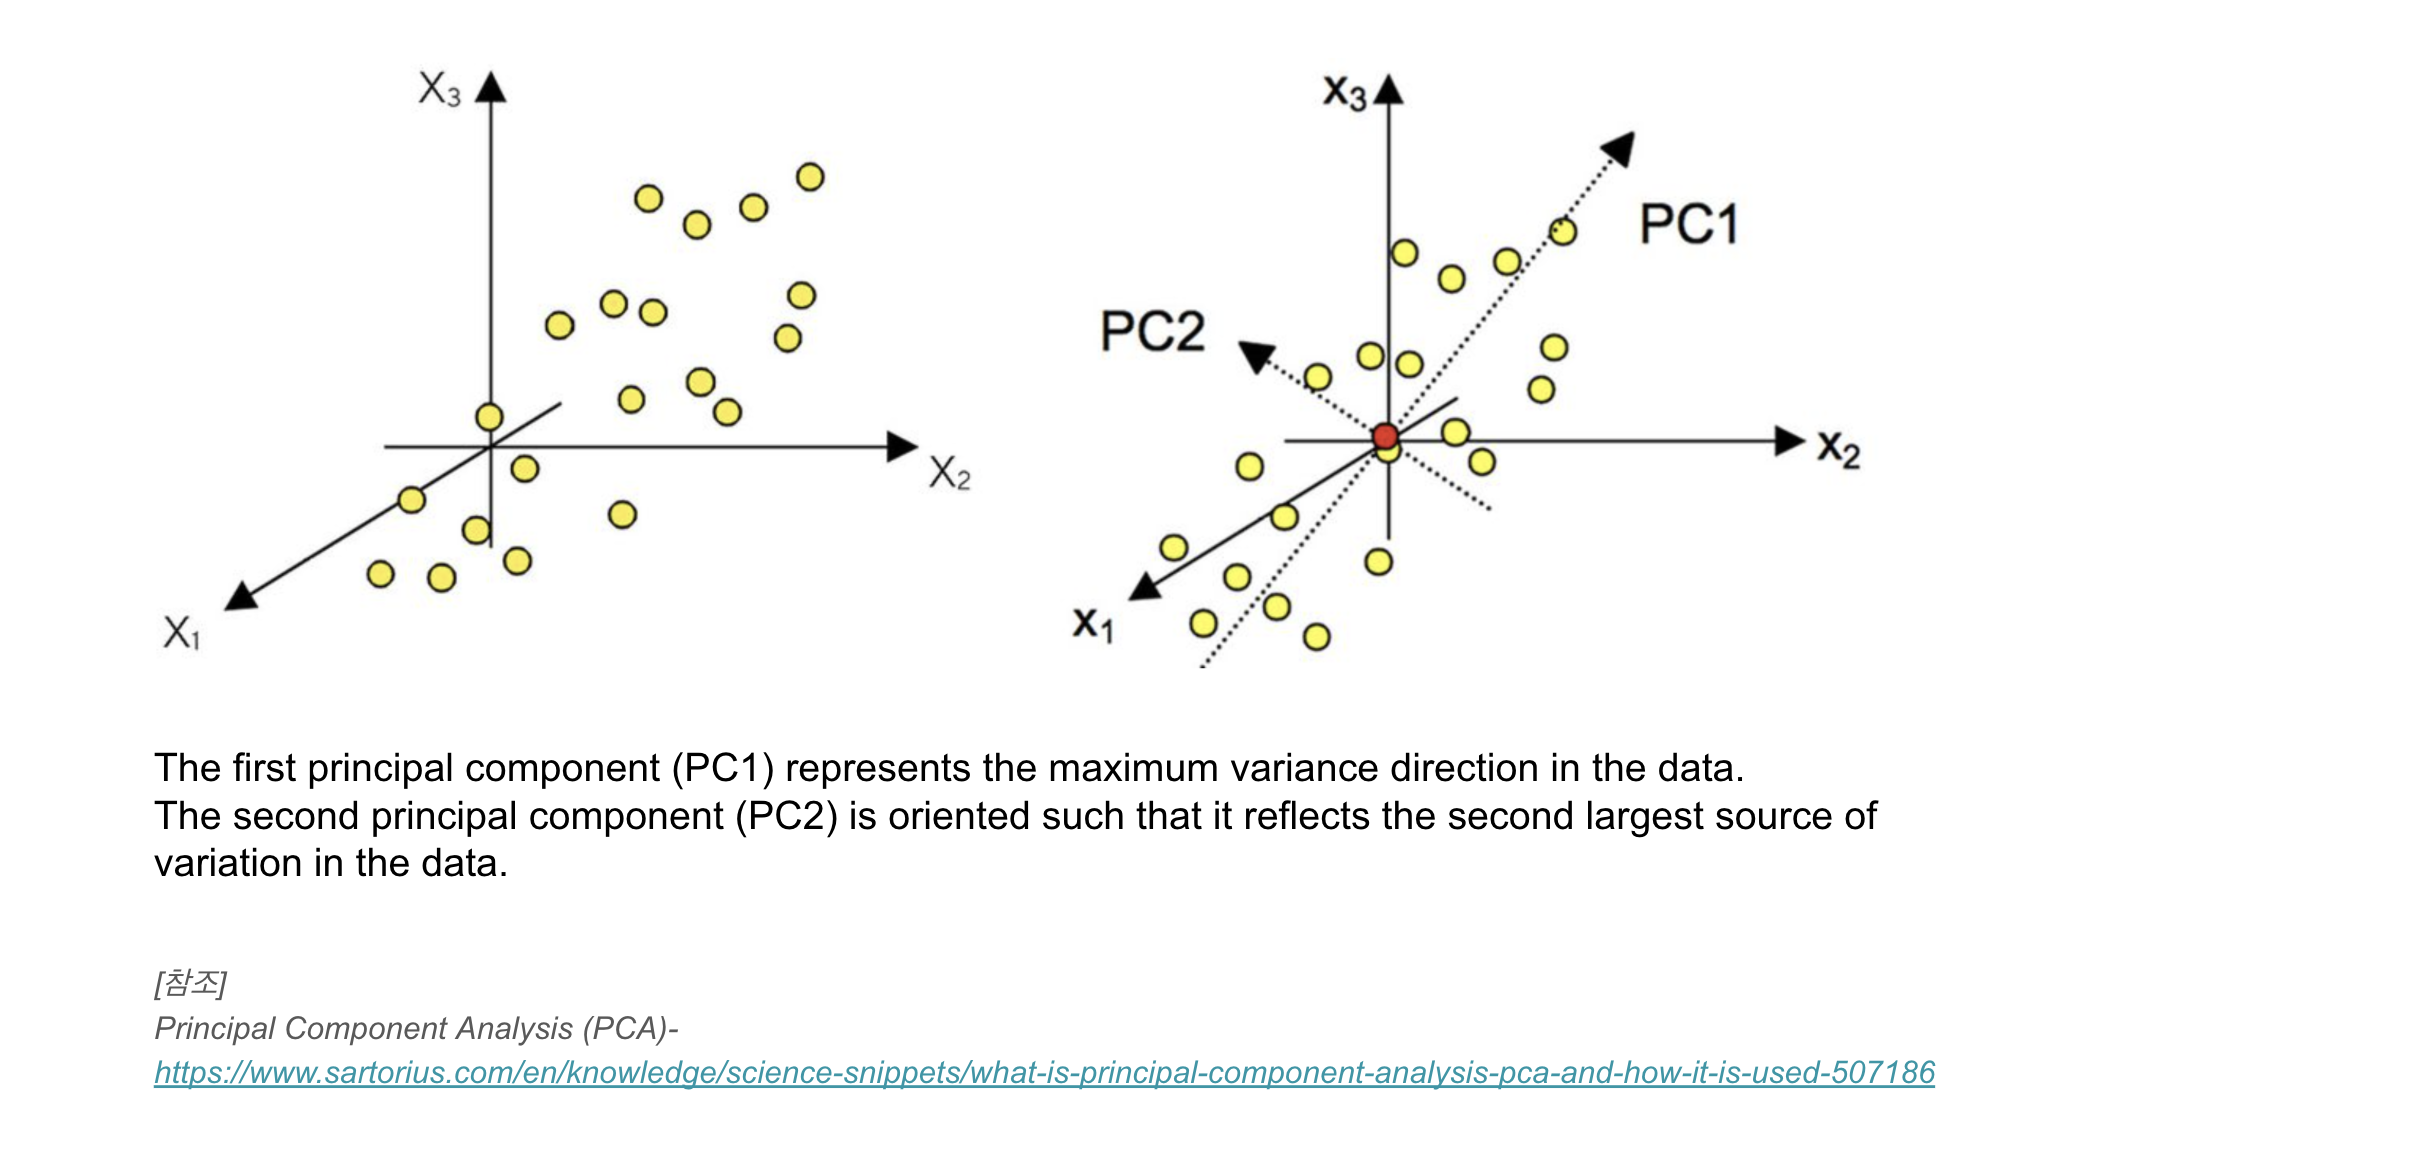


*PCA 모듈 상세보기 >> https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html 


In [87]:
from sklearn.decomposition import PCA


In [88]:
# PCA모듈을 사용해서 [문제22]의 판매자 데이터를 훈련시켜보세요.
# [참고] 그래프를 그리기 위해서는 축소할 차원수를 지정하지 않습니다.
pca = PCA()
pca.fit(scaled_vendor_trans_df)

PCA()

In [89]:
# 그래프를 통해서 적당한 principal components 수를 찾아보세요.
fig= px.line(x=range(scaled_vendor_trans_df.shape[1]),
             y=pca.explained_variance_ratio_.cumsum(),
             labels={'x':'principal components', 'y':'explained variance'})
fig.update_layout(width=800, height=500)
fig.show()

In [90]:
# 위 그래프를 통해 정한 principal components수로 데이터 차원을 축소해보세요.
pca = PCA(n_components=6)
vendor_pca_components = pca.fit_transform(scaled_vendor_trans_df)
vendor_pca_df = pd.DataFrame(data=vendor_pca_components)

In [91]:
# 차원이 축소된 데이터를 확인해보세요.
vendor_pca_df.head(5)

,0,1,2,3,4,5
0,-2.105733,-2.377088,2.950478,-0.021273,1.293028,0.624562
1,-1.906573,-1.996507,3.389698,-0.441012,0.356183,-0.211993
2,-1.056639,0.552012,0.765545,-1.907617,1.022623,0.583764
3,-1.776161,-1.866995,2.239463,-1.224083,1.088274,0.322558
4,-1.591236,-1.343501,2.962410,-1.944974,-0.399380,-0.857580


In [92]:
# 주성분 변수명을 할당해주세요.
vendor_pca_df.columns = ["pc1", "pc2", "pc3", "pc4", "pc5", "pc6"]
vendor_pca_df.head(2)

,pc1,pc2,pc3,pc4,pc5,pc6
0,-2.105733,-2.377088,2.950478,-0.021273,1.293028,0.624562
1,-1.906573,-1.996507,3.389698,-0.441012,0.356183,-0.211993


### 문제 25. Clustering : 판매자 - PCA를 통해 생성된 주성분 살펴보기

In [93]:
import plotly.graph_objects as go

fig = go.Figure(data=go.Heatmap(
    z=pca.components_,
    x=list(scaled_vendor_trans_df.columns),
    y=list(vendor_pca_df.columns),
    hoverongaps = False
))

fig.update_layout(height=500, width=1000)
fig.show()

### 문제 26. Clustering : 판매자 - train/test set 분리하기

In [94]:
train_df, test_df = train_test_split(vendor_pca_df, test_size=0.1)

In [95]:
km_data_df = train_df.copy()

### 문제 27. Clustering : 판매자 - 차원 축소된 데이터로 최적의 k 찾기

In [96]:
!pip install kneed

In [97]:
# 아래 parameter를 참고하여 kneed 모듈을 사용하여 자동으로 elbow값을 찾아보세요.
from kneed import KneeLocator

distortions = []
k_range = range(1, 11)
for i in k_range:
  km = KMeans(n_clusters = i, random_state=42)
  km.fit(train_df)
  distortions.append(km.inertia_)

print(distortions)

kneedle = KneeLocator(x=k_range, y=distortions, S=1.0, curve='convex', direction='decreasing')
print(f'최적의 k : {round(kneedle.elbow, 3)}')
print(f'최적의 k의 값 : {round(kneedle.elbow_y, 3)}')

[48861.1458010339, 39899.156307058074, 31985.031862205073, 28492.724093730903, 26415.30961081952, 24615.988789759067, 22618.186739815388, 20877.88279784249, 19752.289729877346, 18712.42596846208]
최적의 k : 4
최적의 k의 값 : 28492.724


### 문제 28. Clustering : 판매자 - 최적의 k로 K-Means 훈련시키기

In [98]:
km = KMeans(n_clusters=4)
km.fit(train_df)
pd.DataFrame(km.cluster_centers_, columns = train_df.columns)

,pc1,pc2,pc3,pc4,pc5,pc6
0,-0.572047,-1.662382,0.166951,-0.048095,0.053732,0.022800
1,-0.459260,1.508527,0.728205,0.092389,0.106748,-0.022754
2,0.877148,0.621629,-1.306849,-0.054641,-0.254262,0.007220
3,13.752573,-1.166150,2.659417,-0.008498,0.616423,0.286674


In [99]:
# 각 군집별 데이터 수 확인
label_list = list(km.labels_)
[[x, label_list.count(x)] for x in set(label_list)]

[[0, 1641], [1, 1382], [2, 1066], [3, 40]]

In [100]:
# 훈련된 라벨을 저장해주세요.
km_data_df["label_from_km"] = km.labels_


In [101]:
# 훈련결과를 시각화로 확인해보세요.
# [참고] PCA의 첫번째 주성분부터 사용하면 차이를 더 확실히 확인할 수 있습니다.
fig = make_subplots(rows=1, cols=2, subplot_titles=('Actual-test', 'K-means PCA cluster'))

fig.add_trace(
    go.Scatter(x=km_data_df['pc1'],
               y=km_data_df['pc2'],
               mode='markers'),
              row=1, col=1
)

fig.add_trace(
    go.Scatter(x=km_data_df['pc1'],
               y=km_data_df['pc2'],
               mode='markers',
               marker=dict(color=km_data_df['label_from_km'])),
              row=1,col=2
)

fig.update_layout(height=600, width=800)
fig.show()

In [102]:
# 3D 그래프로 변수 3개를 시각화해보세요. 
fig = go.Figure(data=[go.Scatter3d(x=km_data_df['pc1'],
                                   y=km_data_df['pc2'],
                                   z=km_data_df['pc3'],
                                   mode='markers',
                                   marker=dict(
                                       size=5,
                                       color=km_data_df['label_from_km'],
                                       opacity=0.8
                                   ))])

fig.show()

### 문제 29. Clustering : 판매자 - 훈련된 모델에 test set을 사용해 predict 하기

In [103]:
# [문제 14]의 모델을 그대로 사용하여 prediction을 해보세요.
test_vendor_label_df = test_df.copy()
test_cluster = km_model.fit_predict(test_df)
test_vendor_label_df['label_from_km'] = test_cluster

In [105]:
# 3D 그래프로 변수 3개를 시각화해보세요. 
fig = go.Figure(data=[go.Scatter3d(x=test_vendor_label_df['pc1'],
                                   y=test_vendor_label_df['pc2'],
                                   z=test_vendor_label_df['pc3'],
                                   mode='markers',
                                   marker=dict(
                                       size=5,
                                       color=test_vendor_label_df['label_from_km'],
                                       opacity=0.8
                                   ))])

fig.show()